## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    # 建立一個有三層隱藏層之神經網路
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

# optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr = 0.001, decay = 1e-6, momentum=0.7, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 201us/step - loss: 2.2355 - accuracy: 0.1875 - val_loss: 2.1501 - val_accuracy: 0.2672
Epoch 2/500
50000/50000 [==============================] - 8s 167us/step - loss: 2.0855 - accuracy: 0.2824 - val_loss: 2.0289 - val_accuracy: 0.2977
Epoch 3/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.9856 - accuracy: 0.3116 - val_loss: 1.9523 - val_accuracy: 0.3225
Epoch 4/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.9219 - accuracy: 0.3324 - val_loss: 1.9015 - val_accuracy: 0.3430
Epoch 5/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.8798 - accuracy: 0.3459 - val_loss: 1.8643 - val_accuracy: 0.3535
Epoch 6/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.8491 - accuracy: 0.3572 - val_loss: 1.8402 - val_accuracy: 0.3597
Epoch 7/500
50000/50000 [==============================

50000/50000 [==============================] - 8s 155us/step - loss: 1.4336 - accuracy: 0.4963 - val_loss: 1.4798 - val_accuracy: 0.4789
Epoch 56/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.4281 - accuracy: 0.5008 - val_loss: 1.4766 - val_accuracy: 0.4765
Epoch 57/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.4232 - accuracy: 0.5010 - val_loss: 1.4889 - val_accuracy: 0.4721
Epoch 58/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.4197 - accuracy: 0.5043 - val_loss: 1.5045 - val_accuracy: 0.4726
Epoch 59/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.4145 - accuracy: 0.5037 - val_loss: 1.4745 - val_accuracy: 0.4819
Epoch 60/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.4106 - accuracy: 0.5057 - val_loss: 1.4739 - val_accuracy: 0.4821
Epoch 61/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.4053 - accuracy: 0.5071 - val

50000/50000 [==============================] - 8s 160us/step - loss: 1.2221 - accuracy: 0.5712 - val_loss: 1.3839 - val_accuracy: 0.5132
Epoch 110/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.2198 - accuracy: 0.5738 - val_loss: 1.4238 - val_accuracy: 0.5036
Epoch 111/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.2166 - accuracy: 0.5746 - val_loss: 1.3872 - val_accuracy: 0.5013
Epoch 112/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2115 - accuracy: 0.5755 - val_loss: 1.4143 - val_accuracy: 0.4955
Epoch 113/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.2097 - accuracy: 0.5765 - val_loss: 1.4003 - val_accuracy: 0.5077
Epoch 114/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.2064 - accuracy: 0.5766 - val_loss: 1.3733 - val_accuracy: 0.5128
Epoch 115/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2001 - accuracy: 0.5789

50000/50000 [==============================] - 8s 157us/step - loss: 1.0584 - accuracy: 0.6317 - val_loss: 1.3938 - val_accuracy: 0.5196
Epoch 164/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.0581 - accuracy: 0.6301 - val_loss: 1.3807 - val_accuracy: 0.5215
Epoch 165/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.0539 - accuracy: 0.6324 - val_loss: 1.3995 - val_accuracy: 0.5129
Epoch 166/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.0501 - accuracy: 0.6330 - val_loss: 1.3523 - val_accuracy: 0.5242
Epoch 167/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.0475 - accuracy: 0.6334 - val_loss: 1.3508 - val_accuracy: 0.5265
Epoch 168/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.0433 - accuracy: 0.6354 - val_loss: 1.3404 - val_accuracy: 0.5322
Epoch 169/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.0423 - accuracy: 0.6366

50000/50000 [==============================] - 8s 155us/step - loss: 0.9182 - accuracy: 0.6800 - val_loss: 1.4969 - val_accuracy: 0.4965
Epoch 218/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.9151 - accuracy: 0.6807 - val_loss: 1.3729 - val_accuracy: 0.5318
Epoch 219/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.9123 - accuracy: 0.6820 - val_loss: 1.4115 - val_accuracy: 0.5198
Epoch 220/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.9041 - accuracy: 0.6871 - val_loss: 1.4676 - val_accuracy: 0.5123
Epoch 221/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.8986 - accuracy: 0.6888 - val_loss: 1.3938 - val_accuracy: 0.5291
Epoch 222/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.8970 - accuracy: 0.6879 - val_loss: 1.3695 - val_accuracy: 0.5306
Epoch 223/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.9003 - accuracy: 0.6864

50000/50000 [==============================] - 8s 157us/step - loss: 0.7761 - accuracy: 0.7332 - val_loss: 1.9399 - val_accuracy: 0.4609
Epoch 272/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.7831 - accuracy: 0.7323 - val_loss: 1.4123 - val_accuracy: 0.5323
Epoch 273/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.7773 - accuracy: 0.7320 - val_loss: 1.4586 - val_accuracy: 0.5238
Epoch 274/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.7661 - accuracy: 0.7362 - val_loss: 1.5782 - val_accuracy: 0.4974
Epoch 275/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.7660 - accuracy: 0.7363 - val_loss: 1.4650 - val_accuracy: 0.5283
Epoch 276/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.7618 - accuracy: 0.7371 - val_loss: 1.4169 - val_accuracy: 0.5355
Epoch 277/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.7577 - accuracy: 0.7398

50000/50000 [==============================] - 8s 155us/step - loss: 0.6478 - accuracy: 0.7795 - val_loss: 1.5493 - val_accuracy: 0.5303
Epoch 326/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.6501 - accuracy: 0.7792 - val_loss: 1.7131 - val_accuracy: 0.5025
Epoch 327/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.6375 - accuracy: 0.7848 - val_loss: 1.8978 - val_accuracy: 0.4758
Epoch 328/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.6433 - accuracy: 0.7792 - val_loss: 1.8924 - val_accuracy: 0.4850
Epoch 329/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.6370 - accuracy: 0.7833 - val_loss: 1.7051 - val_accuracy: 0.4965
Epoch 330/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.6376 - accuracy: 0.7822 - val_loss: 1.5707 - val_accuracy: 0.5181
Epoch 331/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.6381 - accuracy: 0.7838

50000/50000 [==============================] - 8s 162us/step - loss: 0.5255 - accuracy: 0.8242 - val_loss: 2.1640 - val_accuracy: 0.4580
Epoch 380/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.5351 - accuracy: 0.8215 - val_loss: 1.6410 - val_accuracy: 0.5323
Epoch 381/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.5169 - accuracy: 0.8266 - val_loss: 1.6317 - val_accuracy: 0.5285
Epoch 382/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.5168 - accuracy: 0.8295 - val_loss: 1.7312 - val_accuracy: 0.5127
Epoch 383/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.5301 - accuracy: 0.8243 - val_loss: 1.8826 - val_accuracy: 0.4866
Epoch 384/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.5242 - accuracy: 0.8254 - val_loss: 1.7094 - val_accuracy: 0.5140
Epoch 385/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.4995 - accuracy: 0.8344

50000/50000 [==============================] - 9s 183us/step - loss: 0.4206 - accuracy: 0.8625 - val_loss: 2.0335 - val_accuracy: 0.4960
Epoch 434/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.4227 - accuracy: 0.8628 - val_loss: 1.9192 - val_accuracy: 0.5039
Epoch 435/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.4264 - accuracy: 0.8602 - val_loss: 2.0670 - val_accuracy: 0.4801
Epoch 436/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.4262 - accuracy: 0.8617 - val_loss: 1.9096 - val_accuracy: 0.5118
Epoch 437/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.3960 - accuracy: 0.8735 - val_loss: 2.0035 - val_accuracy: 0.5016
Epoch 438/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.4168 - accuracy: 0.8651 - val_loss: 1.8515 - val_accuracy: 0.5134
Epoch 439/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.4272 - accuracy: 0.8627

50000/50000 [==============================] - 9s 183us/step - loss: 0.3050 - accuracy: 0.9084 - val_loss: 1.9945 - val_accuracy: 0.5154
Epoch 488/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.3519 - accuracy: 0.8914 - val_loss: 1.9799 - val_accuracy: 0.5192
Epoch 489/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.3038 - accuracy: 0.9062 - val_loss: 2.3133 - val_accuracy: 0.4859
Epoch 490/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.3159 - accuracy: 0.9025 - val_loss: 2.2673 - val_accuracy: 0.4887
Epoch 491/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.2954 - accuracy: 0.9113 - val_loss: 2.2707 - val_accuracy: 0.5024
Epoch 492/500
50000/50000 [==============================] - 15s 297us/step - loss: 0.3125 - accuracy: 0.9052 - val_loss: 1.9763 - val_accuracy: 0.5255
Epoch 493/500
50000/50000 [==============================] - 15s 294us/step - loss: 0.3262 - accuracy: 0

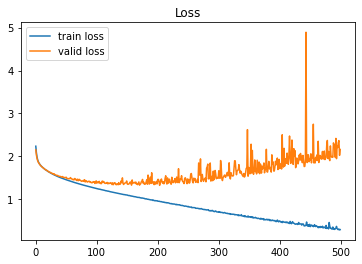

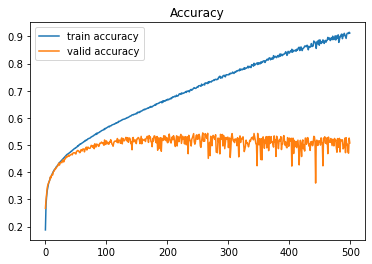

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()